# 6.2 Exploring relationships

### 1. Importing Visualization Libraries and Data

### 2. Exploring Relationships 

##### Correlations  

##### Scatterplots

##### Pair Plots

##### Categorical Plots

### 3. Answering previously generated questions 

### 4. Reseach Questions and Hypothesis


### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Folder location string
path = r'C:\Users\nurgul\Linkedin\02 Data\Prepared Data'

In [3]:
# Importing cleaned dataset
df = pd.read_csv('jobs_posts_clean.csv', index_col=False)

In [4]:
df.head()

,job_id,company_id,title,max_salary,min_salary,work_type,location,applies,views,experience_level,listed_time,approx_salary,name,company_size,state,country,zip_code,skill_abr
0,3757937095,437225,Principal Cloud Security Architect (Remote),275834.0,205956.0,Full-time,United States,31.256076,96.929148,Mid-Senior level,2023-11-04 09:26:40,240895.0,"iHerb, LLC",5.0,California,US,92618,IT
1,3757935381,19181907,Insights Analyst - Auto Industry,64000.0,58000.0,Full-time,United States,17.361502,130.000000,Entry level,2023-11-04 09:26:40,61000.0,Escalent,4.0,MI,US,48152,RSCH
2,3757935381,19181907,Insights Analyst - Auto Industry,64000.0,58000.0,Full-time,United States,24.096085,130.000000,Entry level,2023-11-04 09:26:40,61000.0,Escalent,4.0,MI,US,48152,ANLS
3,3757935381,19181907,Insights Analyst - Auto Industry,64000.0,58000.0,Full-time,United States,31.256076,130.000000,Entry level,2023-11-04 09:26:40,61000.0,Escalent,4.0,MI,US,48152,IT
4,3757935001,73013724,Sales Manager,350000.0,125000.0,Full-time,"Coeur d'Alene, ID",18.329151,66.426309,Mid-Senior level,2023-11-04 06:40:00,237500.0,J. Galt,3.0,Indiana,US,46268,SALE


In [5]:
df.shape

(14681, 18)

In [6]:
df.columns

Index(['job_id', 'company_id', 'title', 'max_salary', 'min_salary',
       'work_type', 'location', 'applies', 'views', 'experience_level',
       'listed_time', 'approx_salary', 'name', 'company_size', 'state',
       'country', 'zip_code', 'skill_abr'],
      dtype='object')

In [7]:
# Counting work_type values 
df.work_type.value_counts()

work_type
Full-time     12422
Contract       1633
Part-time       448
Temporary        89
Internship       46
Other            43
Name: count, dtype: int64

In [8]:
# Counting experience_level values 
df.experience_level.value_counts()

experience_level
Mid-Senior level    7497
Entry level         3684
Associate           2219
Director             939
Executive            224
Internship           118
Name: count, dtype: int64

In [9]:
#Finding Missing Values
df.isnull().sum()

job_id               0
company_id           0
title                0
max_salary           0
min_salary           0
work_type            0
location             0
applies              0
views                0
experience_level     0
listed_time          0
approx_salary        0
name                 0
company_size         0
state                0
country              0
zip_code            17
skill_abr            0
dtype: int64

## 2. Exploring relationships 

#### Correlations 

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df.describe()

,job_id,company_id,max_salary,min_salary,applies,views,approx_salary,company_size
count,14681.000,14681.000,14681.000,14681.000,14681.000,14681.000,14681.000,14681.000
mean,3726749263.489,9562395.312,92209.917,65334.803,20.866,71.767,78772.360,4.542
std,45396620.720,21135021.344,90461.841,60312.282,40.968,147.434,73844.364,1.935
min,2148434586.000,1016.000,10.500,7.250,1.000,1.000,10.250,1.000
25%,3697374934.000,18176.000,55.000,45.000,4.000,8.000,51.080,3.000
50%,3749346362.000,289597.000,88744.000,65000.000,13.676,31.000,77500.000,5.000
75%,3757428375.000,6408728.000,141000.000,101280.000,22.000,72.739,122500.000,6.000
max,3757937095.000,100746448.000,1300000.000,800000.000,980.000,2478.000,1050000.000,7.000


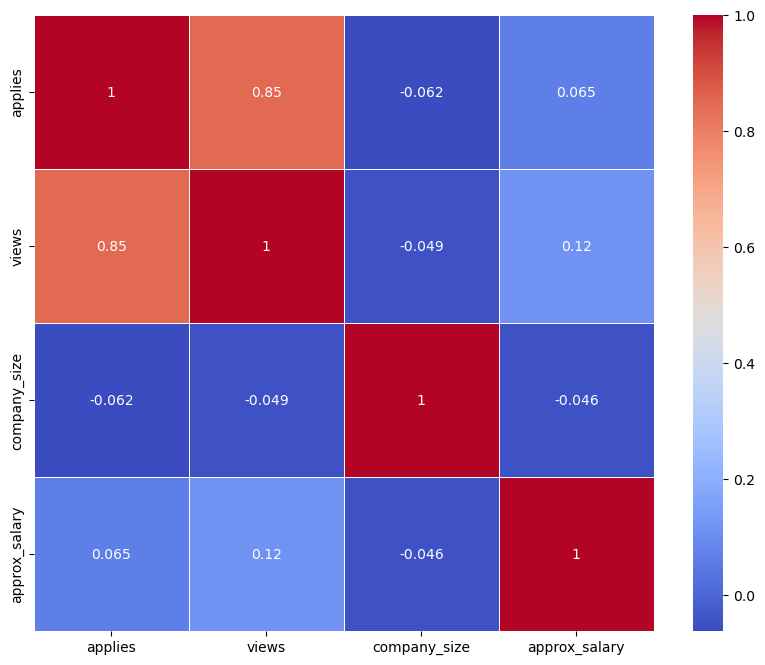

In [12]:
selected_columns = ['applies', 'views', 'company_size', 'approx_salary']

# Create a subset DataFrame with selected columns
correlation_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()



The Matrix heatmap above represents a strong positive correlation (0.85) between the number of applies and views columns. It suggests that as the number of views increases, there is a strong tendency for the number of applications to increase. At the same time, there is a weak positive correlation (0.12) between the views and approximate salary columns. Similar to the apply vs. approximate salary (0.065) correlation, the number of views is only weakly related to the approximate salary. There are weak negative correlations between company size and approximate salary and applies. These correlations suggest a slight impact of company size on other variables, the relationships are not very strong.


##### Scatterplots 

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


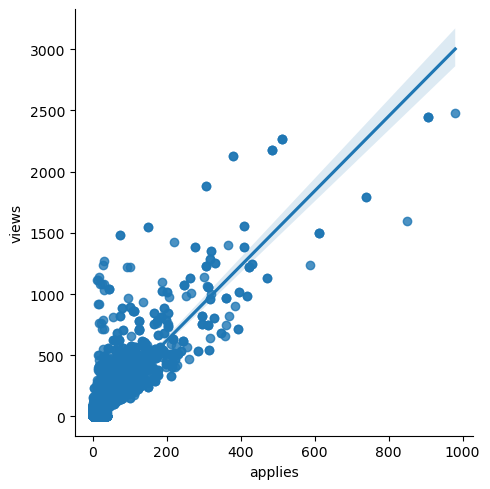

In [13]:
# Scatterplot of most correlated variables
# applies and views scatterplot
sns.lmplot(x = 'applies', y = 'views', data = df)

The scatterplot shows strong correlation between number of applies and views.

#### Pair Plots

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

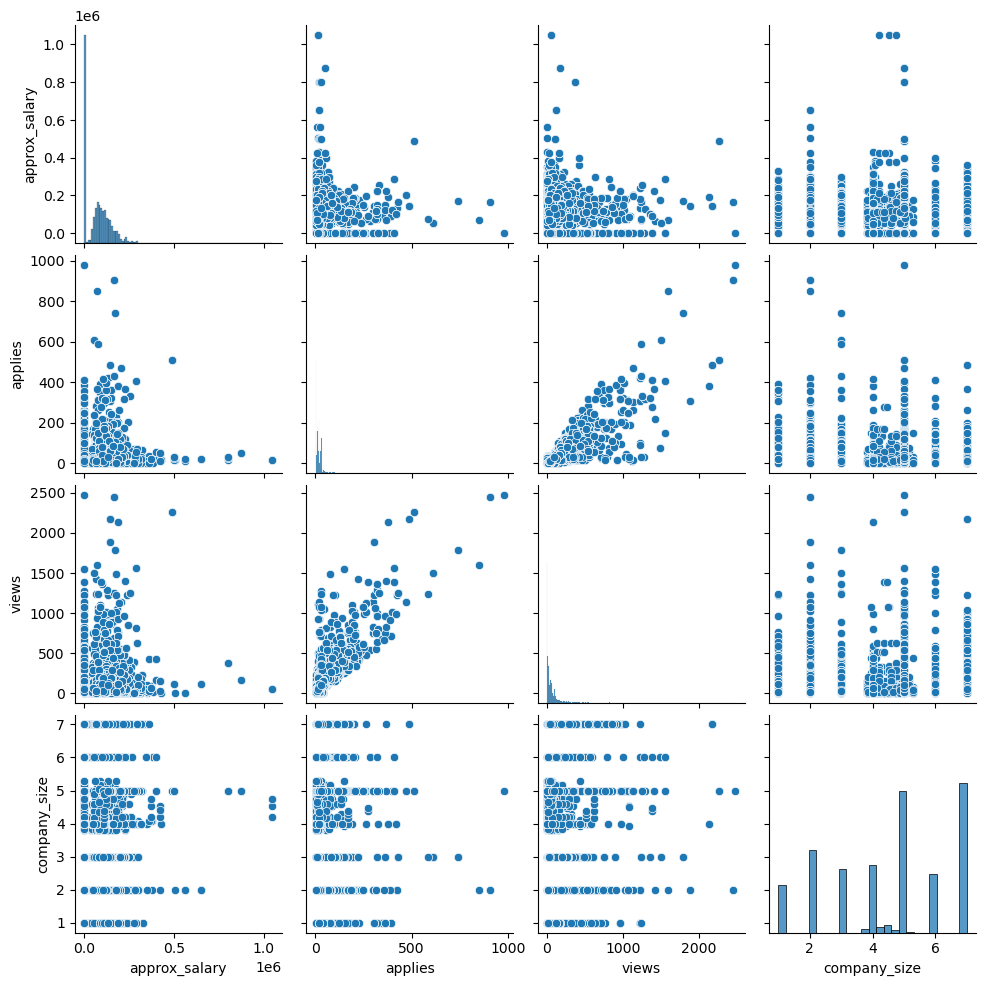

In [14]:
# Select the columns for the pair plot
selected_columns = ['approx_salary', 'applies', 'views', 'company_size']

# Create a pair plot
sns.pairplot(df[selected_columns])

# Show the plot
plt.show()


The distribution shows a High positive correlation, Indicating a strong linear relationship between the number of job applications and the number of views. This suggests that the other tends to increase proportionally as one variable increases.
Positive correlation: Indicates a slight positive relationship between the number of job applications and the approximate salary. This means that salary has a slight effect on a number of applications. 
The distribution of applications and views on company size shows a weak negative correlation, which implies that the company size does not affect the number of applications and views. 
For further analysis, I want to investigate what work types have the most views and applications; this will help to see what work types are in demand. The same applies to the experience level of the required post. 
For further analysis, looking at the seasonality of job posts, most popular locations, experience level in demand, and industries will be essential. 

##### Categorical Plots

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='approx_salary', ylabel='Count'>

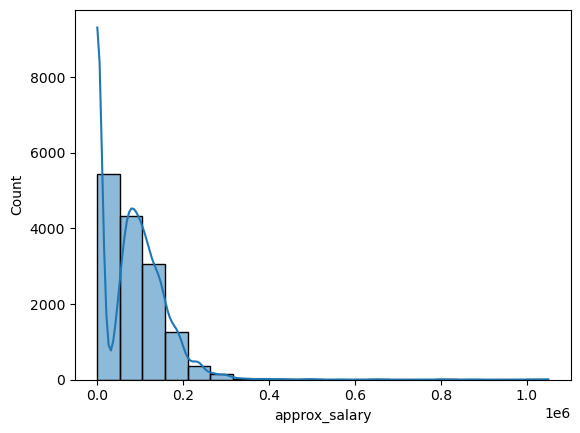

In [15]:
# Creating a histogram to see distribution
sns.histplot(df['approx_salary'], bins = 20, kde = True)

In [16]:
# Categorizing approx_salary column 
salaries = df['approx_salary']

# Define the percentiles for categorization
percentiles = [0, 25, 75, 100]

# Calculate the percentiles
percentile_values = salaries.quantile([p / 100 for p in percentiles])

# Define the categories
labels = ['low', 'medium', 'high']

# Create a new column 'salary_category' with the categories
df['salary_category'] = pd.cut(salaries, bins=percentile_values, labels=labels, right=False)

In [17]:
df['salary_category'].value_counts(dropna = False)

salary_category
medium    7290
high      3720
low       3668
NaN          3
Name: count, dtype: int64

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


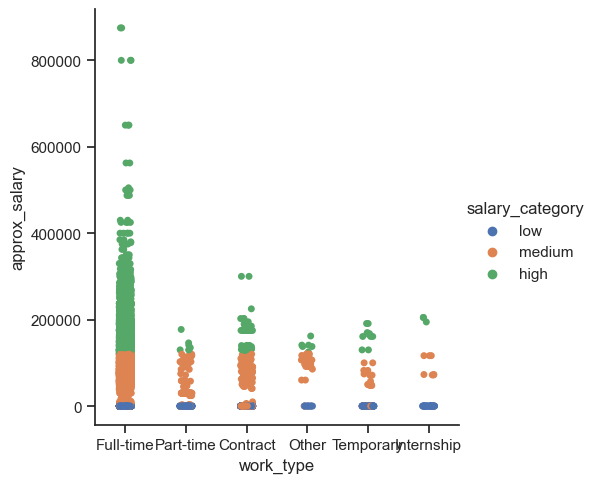

In [18]:
# Create a categorical plot in seaborn using the approx_salary categories created above

sns.set(style="ticks")
g = sns.catplot(x="work_type", y="approx_salary", hue="salary_category", data=df)

From the category plot on work types and approximate salary categories, we can observe that full-time jobs have the highest frequency and are mostly considered high-paid. At the same time, part-time jobs and internships can be considered low-paid. Contract-type jobs have the medium category of salaries.  

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


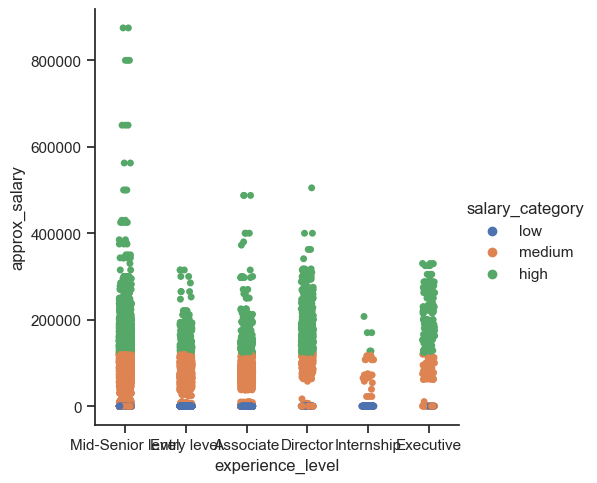

In [19]:
# Create a categorical plot in seaborn using the approx_salary categories created above

sns.set(style="ticks")
g = sns.catplot(x="experience_level", y="approx_salary", hue="salary_category", data=df)

As an expected entry-level, internships and associate positions were considered lower paid. Meanwhile, executive, director, and mid-senior positions are considered the most highly paid. Most of the experience-level positions have mid-level salaries.    

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='applies', ylabel='Count'>

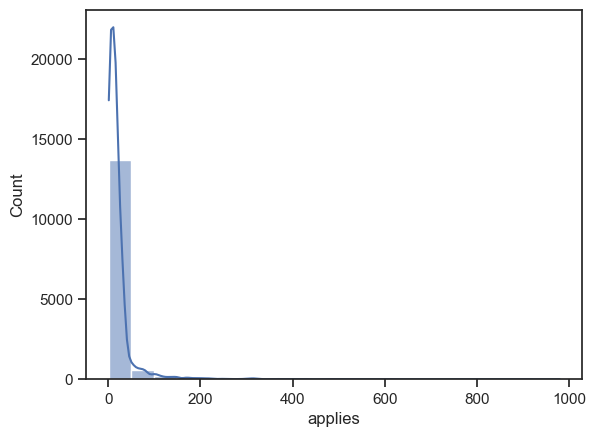

In [20]:
# Creating a histogram to see distribution
sns.histplot(df['applies'], bins = 20, kde = True)

In [21]:
#Counting applies 
counts = df['applies'].value_counts()

# Convert to DataFrame
counts_df = pd.DataFrame({'applies': counts.index, 'count': counts.values})

print(counts_df)


     applies  count
0      1.000   1618
1      2.000   1023
2      3.000    648
3     31.256    578
4     10.229    575
..       ...    ...
261  132.000      1
262  358.000      1
263  368.000      1
264  220.000      1
265  175.000      1

[266 rows x 2 columns]


In [22]:
# Categorizing applies column 

bins = [0, 5, 23, float('inf')]  
labels = ['low', 'medium', 'high']  

# Create a new column 'applies_category' with the categories
counts_df['applies_category'] = pd.cut(counts_df['applies'], bins=bins, labels=labels, right=False)



Based on the statistics I decided to divide "applies" into three categories (low, medium, high):
Low: 1 to 4
This range covers the minimum value up to the 25th percentile. These could be considered as low levels of applications.

Medium: 5 to 22
This range covers the 25th percentile up to the 75th percentile. It captures the middle range of application values.

High: 23 and above
This range includes values above the 75th percentile up to the maximum value. These are higher levels of applications.

In [23]:
counts_df.head()

,applies,count,applies_category
0,1.000,1618,low
1,2.000,1023,low
2,3.000,648,low
3,31.256,578,high
4,10.229,575,medium


In [24]:
# Adding applies category to the main data set
df = df.merge(counts_df[['applies', 'applies_category']], on='applies', how='left')

In [25]:
df.head()

,job_id,company_id,title,max_salary,min_salary,work_type,location,applies,views,experience_level,listed_time,approx_salary,name,company_size,state,country,zip_code,skill_abr,salary_category,applies_category
0,3757937095,437225,Principal Cloud Security Architect (Remote),275834.000,205956.000,Full-time,United States,31.256,96.929,Mid-Senior level,2023-11-04 09:26:40,240895.000,"iHerb, LLC",5.000,California,US,92618,IT,high,high
1,3757935381,19181907,Insights Analyst - Auto Industry,64000.000,58000.000,Full-time,United States,17.362,130.000,Entry level,2023-11-04 09:26:40,61000.000,Escalent,4.000,MI,US,48152,RSCH,medium,medium
2,3757935381,19181907,Insights Analyst - Auto Industry,64000.000,58000.000,Full-time,United States,24.096,130.000,Entry level,2023-11-04 09:26:40,61000.000,Escalent,4.000,MI,US,48152,ANLS,medium,high
3,3757935381,19181907,Insights Analyst - Auto Industry,64000.000,58000.000,Full-time,United States,31.256,130.000,Entry level,2023-11-04 09:26:40,61000.000,Escalent,4.000,MI,US,48152,IT,medium,high
4,3757935001,73013724,Sales Manager,350000.000,125000.000,Full-time,"Coeur d'Alene, ID",18.329,66.426,Mid-Senior level,2023-11-04 06:40:00,237500.000,J. Galt,3.000,Indiana,US,46268,SALE,high,medium


In [26]:
df['applies_category'].value_counts(dropna = False)

applies_category
medium    7353
low       3825
high      3503
Name: count, dtype: int64

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


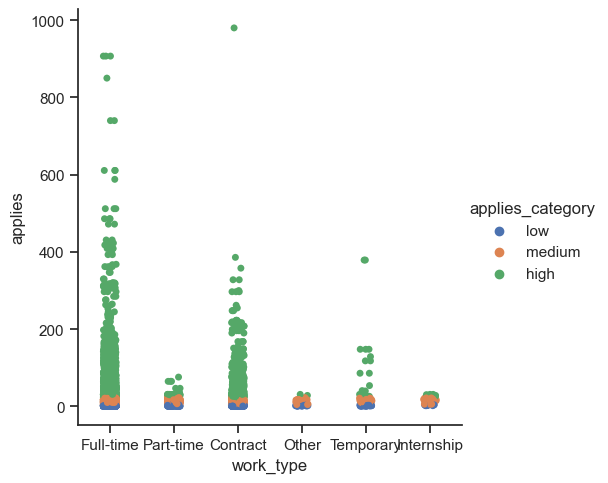

In [27]:
# Create a categorical plot in seaborn using the applies categories created above

sns.set(style="ticks")
g = sns.catplot(x="work_type", y="applies", hue="applies_category", data=df)

It is evident that full-time and contract-type positions receive the highest number of applications, while part-time and temporary roles exhibit the lowest application rates. Surprisingly, the majority of applications for internships fall within the middle category.

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


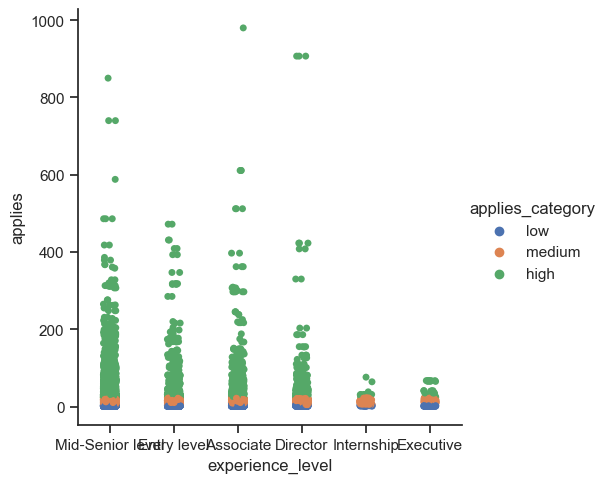

In [28]:
# Create a categorical plot in seaborn using the applies categories created above

sns.set(style="ticks")
g = sns.catplot(x="experience_level", y="applies", hue="applies_category", data=df)

Mid-senior, Entry, Associate and director level posts have the highest number of applicants, whereas executive level has the lowest. Internships fall into mid-level applies category.  

## 3. Answering previously generated questions

1. What job titles have the most applies? Entry, Associate and director level posts

## 4. Reseach Questions and Hypothesis

New questions:
What industries have the most views?
Which industries are the highest paid?
In which industries are the most job posts available?
Is there any correlation between the number of applications and the locations of job posts?
What are the average salary, location, experience level, contract type, and company size for data analyst and data scientist posts?

Hypothesis: 
1. Industries related to technology, finance, and healthcare might have the most views due to their popularity and demand.
2. Job posts in metropolitan areas might receive more applications compared to rural areas, as there could be a higher concentration of job seekers in urban locations.
3.  Industries like technology, healthcare, and finance may have the highest number of job postings due to their continuous growth and demand.

In [29]:
# Exporting dataframe 
df.to_csv('jobs_posts_clean_latest1.csv', index=False)

In [ ]:
df.